### Setting the frame of science

## Loading Data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as plt


If you cannot run, maybe you need to run "pip3 install matplotlib"

## Quick Data Exploration

Once you have read the dataset, you can have a look at few top rows by using the function head()

In [5]:
df = pd.read_csv("abalone.csv")




In [6]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


You can see the followings:
  No missing values

# We have 4177 rows and 11 columns


In [8]:
df.shape

(4177, 9)

## Distribution Analysis

Now that we are familiar with basic data characteristics, let us study distribution of various variables. 
Lets start by plotting the histogram of goout using the following commands:

In [9]:
df['Length'].hist(bins=50)


Here we observe that there are few outliers. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

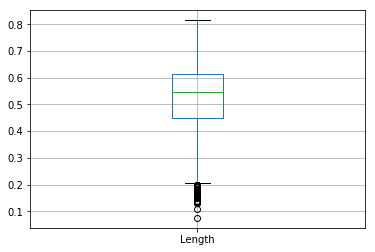

In [10]:
df.boxplot(column='Length')

This confirms the presence of a lot of outliers because data is a little bit skewed.



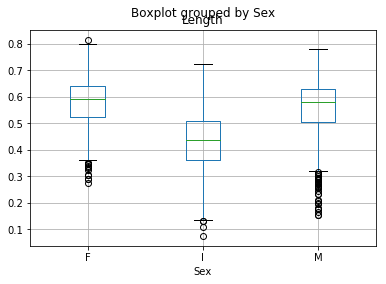

In [11]:
df.boxplot(column='Length', by = 'Sex')

We can see that there is no substantial different between female abalones and male abalones but length of infants is quite less.
Now, Let’s look at the histogram and boxplot of Height using the following command:

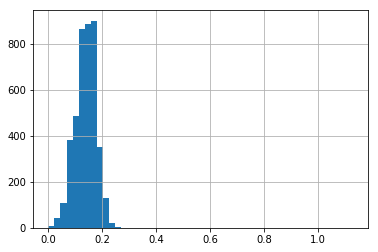

In [12]:
df['Height'].hist(bins=50)

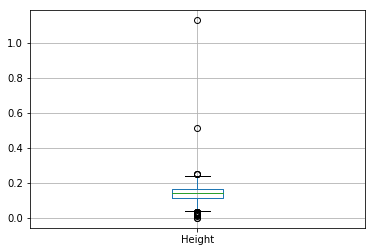

In [13]:
df.boxplot(column='Height')

we might have the possiblity of having outliers in height

Now let's try to cross the data between Diameter and Length. There might co relate

## Data Cleaning

While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model. This exercise is typically referred as “Data Munging”. Here are the problems, we are already aware of:

There are no missing values.


#### Check missing values in the dataset

In [14]:
df.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

This command should tell us the number of missing values in each column as isnull() returns 1, if the value is null.

#### How to fill missing values 


In [15]:
df['Sex'].fillna(df['Rings'].mode()[0], inplace=True)


#### How to treat for extreme values in distribution of Length

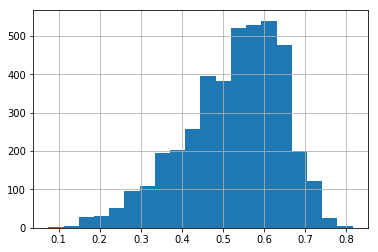

In [16]:
df['Length'].hist(bins=20)

Since this looks like a power law, we can make this graph looks more normal using **log-transformation.**

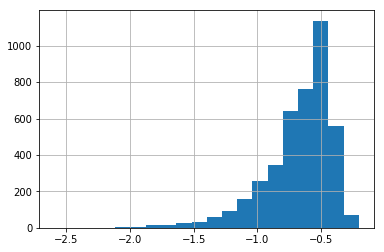

In [17]:
df['Length_log'] = np.log(df['Length'])
df['Length_log'].hist(bins=20)

Now it looks much better!

#### How to treat for extreme values in distribution for Height

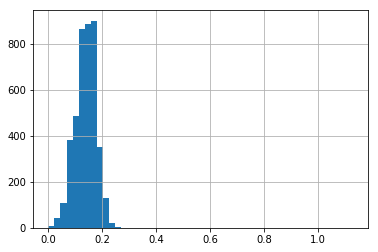

In [18]:
df['Height'].hist(bins=50)

One intuition can be that all the weight variables can contribute to abalone sex.  So it might be a good idea to combine all of them and take a log transformation of the same.

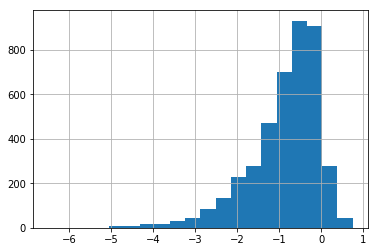

In [19]:
df['Whole weight'] = df['Shucked weight'] + df['Viscera weight']
df['Whole weight_log'] = np.log(df['Whole weight'])
df['Whole weight_log'].hist(bins=20) 

Summary:
- Replace missing values with mean, or the highest frequency category
- Log-transformation is often good to treat very skewed data
- Plotting is a good way to understand your data
- Python is quite easy!

### Building models!!  (Bonus for those who are curious)

After, we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose and we will follow the trail.

#### Making categories into numbers

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Sex','Rings']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Sex                   int64
Length              float64
Diameter            float64
Height              float64
Whole weight        float64
Shucked weight      float64
Viscera weight      float64
Shell weight        float64
Rings                 int64
Length_log          float64
Whole weight_log    float64
dtype: object

Let's make a generic function for easy future use :)

In [21]:

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
#for splitting test and training
from sklearn.model_selection import train_test_split
from scipy.stats import skew
import matplotlib.pyplot as plt



#for cross validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#for accuracy, precision, f-score
from sklearn import metrics
from sklearn.metrics import classification_report

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, x, y):
    
    #split into 70% training, and 30% testing
    x_train, x_test, y_train, y_test = train_test_split(data[x], data[y], test_size=0.3, random_state=2)

    #Fit the model:
    model.fit(x_train, y_train)
    
    #Make predictions on test set:
    predictions = model.predict(x_test)
    
    #Print accuracy
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(predictions.score(X_test, y_test)))
    accuracy = metrics.accuracy_score(y_test, predictions)
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))


    #Perform k-fold cross-validation with 5 folds by subdividing the training set multiple times
    kfold = model_selection.KFold(n_splits=5)
    results = model_selection.cross_val_score(model, x_test, y_test, cv=kfold)
    print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

    #print precision, recall, and f-score
    print(classification_report(y_test, predictions))
    
    

    

#### Logistic Regression

In [22]:
x = ['Rings','Shell weight']
y = 'Sex'
model= LogisticRegression()
classification_model(model, df, x, y)

Accuracy : 53.429%
10-fold cross validation average accuracy: 0.519
              precision    recall  f1-score   support

           0       0.53      0.07      0.12       374
           1       0.65      0.78      0.71       424
           2       0.45      0.69      0.54       456

   micro avg       0.53      0.53      0.53      1254
   macro avg       0.54      0.51      0.46      1254
weighted avg       0.54      0.53      0.47      1254



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

#### k-nearest neighbors

In [25]:
x = ['Rings','Shell weight','Whole weight']
y = 'Sex'
model = KNeighborsClassifier(n_neighbors=5)   #<--------CHANGE ONLY HERE
classification_model(model, df, x, y)


Accuracy : 51.675%
10-fold cross validation average accuracy: 0.508
              precision    recall  f1-score   support

           0       0.39      0.44      0.41       374
           1       0.70      0.72      0.71       424
           2       0.45      0.39      0.42       456

   micro avg       0.52      0.52      0.52      1254
   macro avg       0.51      0.52      0.51      1254
weighted avg       0.52      0.52      0.52      1254



#### Decision Tree

In [30]:
x = ['Rings','Shell weight']  
y = 'Sex'
model = DecisionTreeClassifier()   #<--------CHANGE ONLY HERE
classification_model(model, df, x, y)

Accuracy : 50.000%
10-fold cross validation average accuracy: 0.463
              precision    recall  f1-score   support

           0       0.38      0.45      0.41       374
           1       0.67      0.66      0.67       424
           2       0.46      0.39      0.42       456

   micro avg       0.50      0.50      0.50      1254
   macro avg       0.50      0.50      0.50      1254
weighted avg       0.51      0.50      0.50      1254



**Adding more X does not mean good.  Choose only the relevant x!!!